In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

/Users/suhilroshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


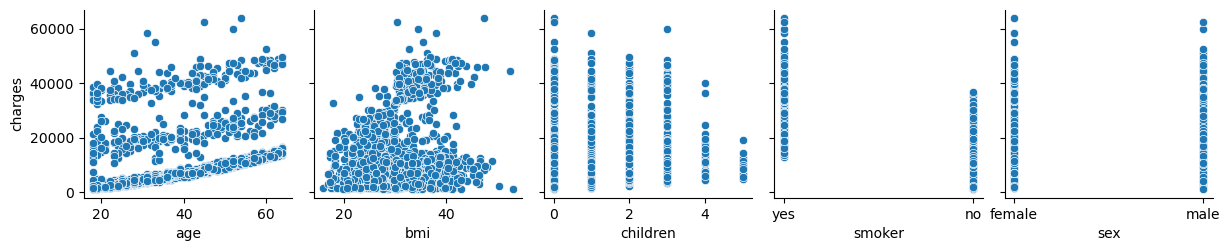

In [4]:
sns.pairplot(data[['age', 'bmi', 'children', 'smoker', 'sex', 'charges']],
x_vars = ['age', 'bmi','children', 'smoker', 'sex'], y_vars ='charges', aspect = 1)

In [5]:
data['sex_boolean'] = data['sex'].map({'male': 1, 'female': 0})
data.drop(['sex'], axis=1, inplace=True)
data['smoker_boolean'] = data['smoker'].map({'yes' : 1, 'no': 0})
data.drop(['smoker'], axis=1, inplace=True)
data['region_encoded'] = data['region'].map({'southeast' : 1, 'southwest': 2,
                                            'northwest' : 3, 'northeast': 4})
data.drop(['region'], axis=1, inplace=True)

# Baseline model checking!

In [6]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [7]:
from sklearn import linear_model

In [8]:
lr = linear_model.LinearRegression()
lr.fit(X,y)

LinearRegression()

In [9]:
coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
age,256.710953
bmi,340.634048
children,473.239957
sex_boolean,-131.183601
smoker_boolean,23861.980033
region_encoded,369.816345


# smoking has the most effect on the cost compared to other features!

# negative coeeficient of sex implies that, the value of sex increases, the costs actually comes down!



In [10]:
predictions = lr.predict(X)

In [11]:
Scores = pd.DataFrame({'Actual':y, 'Predicted':predictions})
Scores

,Actual,Predicted
0,16884.92400,25496.991252
1,1725.55230,3350.062141
2,4449.46200,6601.363365
3,21984.47061,3698.003420
4,3866.85520,5544.707716
...,...,...
1333,10600.54830,12297.149896
1334,2205.98080,3487.281831
1335,1629.83350,4057.158654
1336,2007.94500,1433.101623


In [12]:
# compute performance of the model

from sklearn import metrics
import numpy as np

In [13]:
RMSE = np.sqrt(metrics.mean_squared_error(y, predictions))
print('RMSE', RMSE)

Average_cost = y.mean()
print('Average cost', Average_cost)

R_squared = metrics.r2_score(y, predictions)
print('R squared', R_squared)

print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

RMSE 6042.706565212447
Average cost 13270.422265141257
R squared 0.7508283519755357
Mean of target variable: 13270.422265141257
Relative Error: 45.54%


<Axes: >

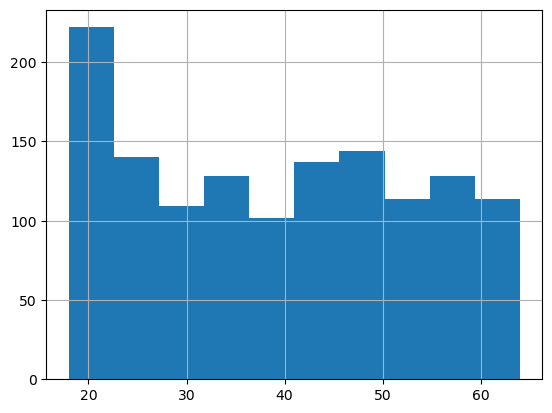

In [14]:
data['age'].hist()

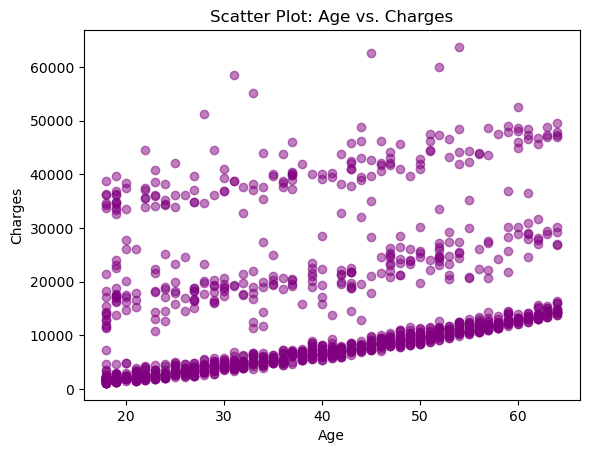

In [15]:
plt.scatter(data['age'], data['charges'], alpha=0.5, color='purple')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatter Plot: Age vs. Charges")
plt.show()

<Axes: xlabel='age'>

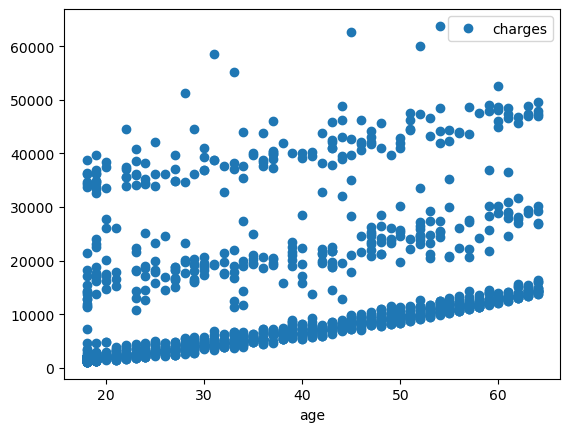

In [16]:
data.plot(x='age', y='charges', style='o')

<Axes: >

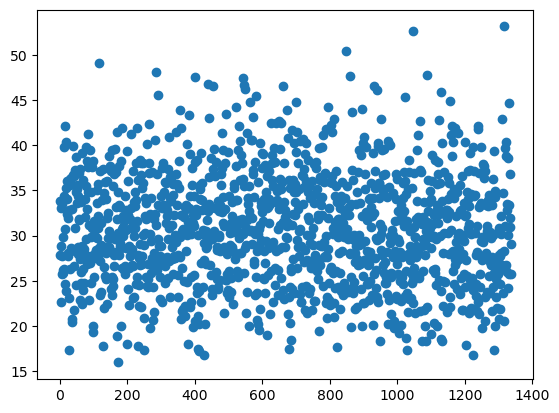

In [17]:
data['bmi'].plot(style='o')

In [18]:
data

,age,bmi,children,charges,sex_boolean,smoker_boolean,region_encoded
0,19,27.900,0,16884.92400,0,1,2
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,3
4,32,28.880,0,3866.85520,1,0,3
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,3
1334,18,31.920,0,2205.98080,0,0,4
1335,18,36.850,0,1629.83350,0,0,1
1336,21,25.800,0,2007.94500,0,0,2


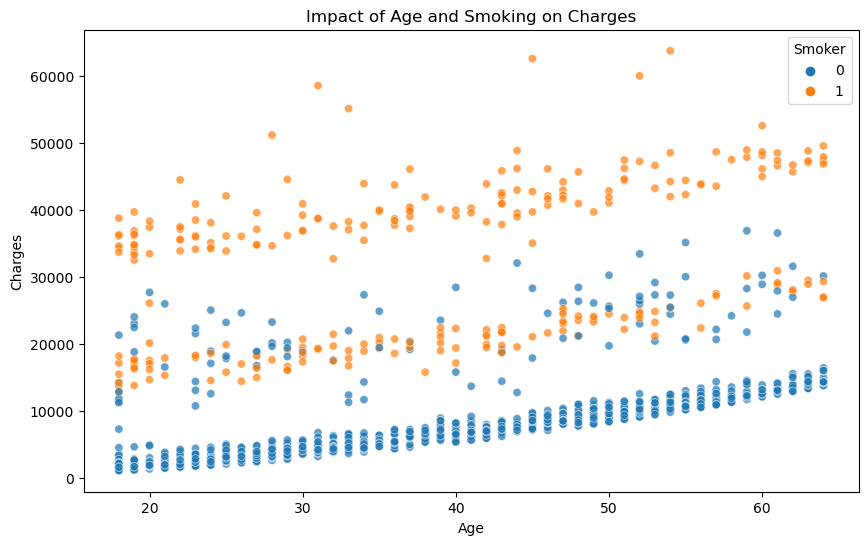

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['age'], y=data['charges'], hue=data['smoker_boolean'], alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Impact of Age and Smoking on Charges")
plt.legend(title="Smoker")
plt.show()

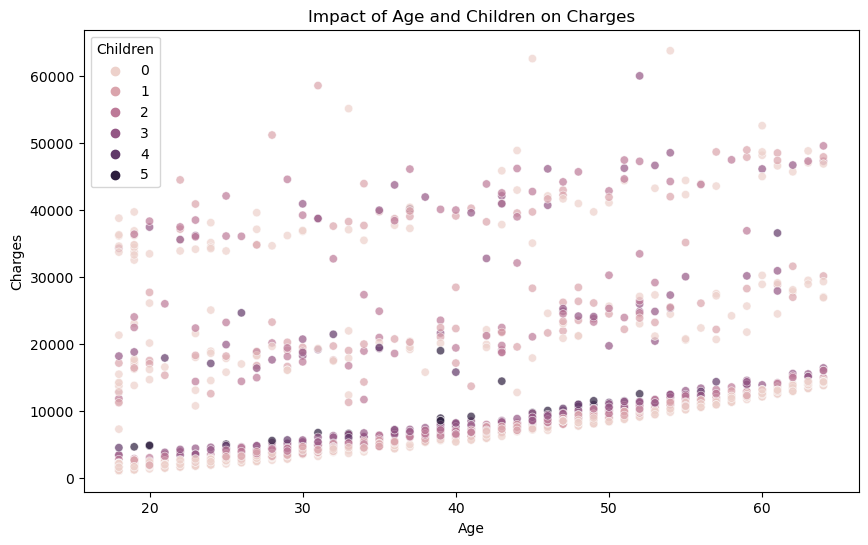

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['age'], y=data['charges'], hue=data['children'], alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Impact of Age and Children on Charges")
plt.legend(title="Children")
plt.show()

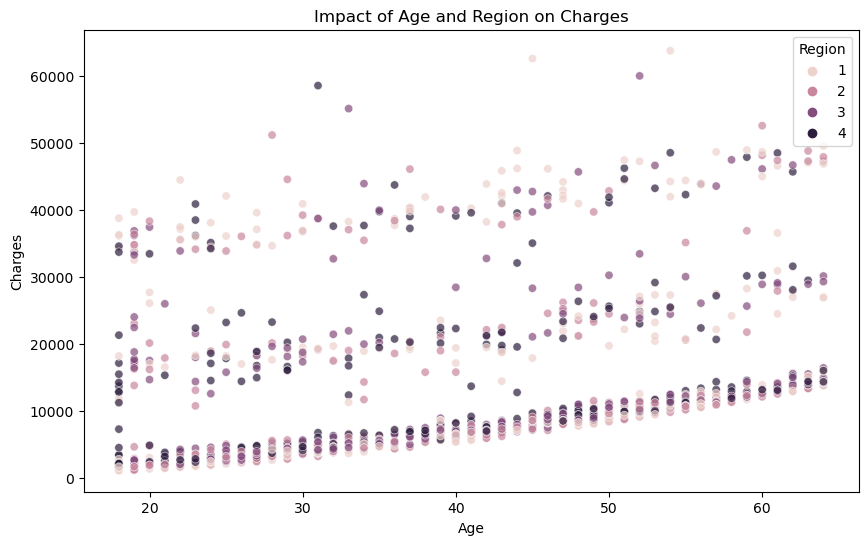

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['age'], y=data['charges'], hue=data['region_encoded'], alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Impact of Age and Region on Charges")
plt.legend(title="Region")
plt.show()

# Feature 1 -- Smoker and Children!

In [22]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [23]:
data['smoker_and_children'] = data['smoker_boolean'] * data['children']
print('Number of customers who are both smokers and has childrens', 
      data[data.smoker_and_children == 1].shape[0])

Number of customers who are both smokers and has childrens 61


In [24]:
data[data['smoker_and_children'] == 1]

,age,bmi,children,charges,sex_boolean,smoker_boolean,region_encoded,smoker_and_children
23,34,31.920,1,37701.87680,0,1,4,1
34,28,36.400,1,51194.55914,1,1,2,1
38,35,36.670,1,39774.27630,1,1,4,1
49,36,35.200,1,38709.17600,1,1,1,1
52,48,28.000,1,23568.27200,1,1,2,1
...,...,...,...,...,...,...,...,...
1208,37,25.555,1,20296.86345,0,1,4,1
1218,46,34.600,1,41661.60200,0,1,2,1
1249,32,33.630,1,37607.52770,1,1,4,1
1278,39,29.925,1,22462.04375,1,1,4,1


In [25]:
X = data[['age', 'bmi', 'children', 'sex_boolean', 'smoker_boolean',
         'region_encoded', 'smoker_and_children']]
y = data['charges']

In [26]:
lr = linear_model.LinearRegression()

lr.fit(X,y)

LinearRegression()

In [27]:
coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
age,257.026838
bmi,340.179231
children,553.886321
sex_boolean,-118.429115
smoker_boolean,24337.918838
region_encoded,371.741331
smoker_and_children,-429.847822


In [28]:
# 	Coefficient
# age	256.710953
# bmi	340.634048
# children	473.239957
# sex_boolean	-131.183601
# smoker_boolean	23861.980033
# region_encoded	369.816345


In [29]:
predictions = lr.predict(X)

Scores = pd.DataFrame({'Actual':y, 'Predictions': predictions})
Scores

,Actual,Predictions
0,16884.92400,25872.702960
1,1725.55230,3338.325243
2,4449.46200,6754.428257
3,21984.47061,3619.240965
4,3866.85520,5462.820878
...,...,...
1333,10600.54830,12461.937516
1334,2205.98080,3388.760453
1335,1629.83350,3950.620068
1336,2007.94500,1334.461413


In [30]:
# RMSE 6042.706565212447
# Average cost 13270.422265141257
# R squared 0.7508283519755357
# NRMSE 0.005657908519970849
# Mean of target variable: 13270.422265141257
# Relative Error: 45.54%

In [31]:
# mean_absolute_error = metrics.mean_absolute_error(y, predictions)
# print('MAE', mean_absolute_error)

RMSE = np.sqrt(metrics.mean_squared_error(y, predictions))
print('RMSE', RMSE)

Average_cost = y.mean()
print('Average cost', Average_cost)

R_squared = metrics.r2_score(y, predictions)
print('R squared', R_squared)

print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

RMSE 6039.320782535054
Average cost 13270.422265141257
R squared 0.7511074999668054
Mean of target variable: 13270.422265141257
Relative Error: 45.51%


In [32]:
data.drop('smoker_and_children', axis=1, inplace=True)

# Feature 2 -- Smoker, male and female

In [33]:
data['smoker_and_female'] = ((data['smoker_boolean'] == 1) &
                               (data['sex_boolean'] == 0)).astype(int)
data['smoker_and_male'] = ((data['smoker_boolean'] == 1) &
                               (data['sex_boolean'] == 1)).astype(int)


In [34]:
data[data['smoker_and_female'] == 0]

,age,bmi,children,charges,sex_boolean,smoker_boolean,region_encoded,smoker_and_female,smoker_and_male
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,0,3,0,0
4,32,28.880,0,3866.85520,1,0,3,0,0
5,31,25.740,0,3756.62160,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1332,52,44.700,3,11411.68500,0,0,2,0,0
1333,50,30.970,3,10600.54830,1,0,3,0,0
1334,18,31.920,0,2205.98080,0,0,4,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0


In [35]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [36]:
lr = linear_model.LinearRegression()

lr.fit(X,y)

LinearRegression()

In [37]:
coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
age,256.718478
bmi,336.695345
children,462.292959
sex_boolean,-595.362799
smoker_boolean,15813.273903
region_encoded,373.963841
smoker_and_female,6743.290118
smoker_and_male,9069.983785


In [38]:
predictions = lr.predict(X)

Scores = pd.DataFrame({'Actual':y, 'Predictions': predictions})
Scores

,Actual,Predictions
0,16884.92400,24437.760549
1,1725.55230,3093.846046
2,4449.46200,6326.361332
3,21984.47061,3504.723949
4,3866.85520,5327.099229
...,...,...
1333,10600.54830,12038.603989
1334,2205.98080,3725.921022
1335,1629.83350,4263.937551
1336,2007.94500,1687.573260


In [39]:
# mean_absolute_error = metrics.mean_absolute_error(y, predictions)
# print('MAE', mean_absolute_error)

RMSE = np.sqrt(metrics.mean_squared_error(y, predictions))
print('RMSE', RMSE)

Average_cost = y.mean()
print('Average cost', Average_cost)

R_squared = metrics.r2_score(y, predictions)
print('R squared', R_squared)

print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

RMSE 6024.8920367351075
Average cost 13270.422265141257
R squared 0.7522953542990993
Mean of target variable: 13270.422265141257
Relative Error: 45.40%


In [40]:
data.drop(['smoker_and_male'], axis=1, inplace=True)
data.drop(['smoker_and_female'], axis=1, inplace=True)

In [41]:
X = data.drop(['charges'], axis=1)
y = data['charges']

lr = linear_model.LinearRegression()
lr.fit(X,y)

coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeffs



,Coefficient
age,256.710953
bmi,340.634048
children,473.239957
sex_boolean,-131.183601
smoker_boolean,23861.980033
region_encoded,369.816345


In [42]:

# Coefficient
# age	256.710953
# bmi	340.634048
# children	473.239957
# sex_boolean	-131.183601
# smoker_boolean	23861.980033
# region_encoded	369.816345


In [43]:
mean_absolute_error = metrics.mean_absolute_error(y, predictions)
print('MAE', mean_absolute_error)

RMSE = np.sqrt(metrics.mean_squared_error(y, predictions))
print('RMSE', RMSE)

Average_cost = y.mean()
print('Average cost', Average_cost)

R_squared = metrics.r2_score(y, predictions)
print('R squared', R_squared)

print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

MAE 4137.810540676261
RMSE 6024.8920367351075
Average cost 13270.422265141257
R squared 0.7522953542990993
Mean of target variable: 13270.422265141257
Relative Error: 45.40%


# Feature 3 -- bin ages into different columns

In [44]:
data

,age,bmi,children,charges,sex_boolean,smoker_boolean,region_encoded
0,19,27.900,0,16884.92400,0,1,2
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,3
4,32,28.880,0,3866.85520,1,0,3
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,3
1334,18,31.920,0,2205.98080,0,0,4
1335,18,36.850,0,1629.83350,0,0,1
1336,21,25.800,0,2007.94500,0,0,2


In [45]:
bins = [17, 25, 35, 45, 55, 65, 100]  
labels = ["17-25", "25-35", "35-45", "45-55", "55-65", "65+"]
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

In [46]:
data

,age,bmi,children,charges,sex_boolean,smoker_boolean,region_encoded,age_group
0,19,27.900,0,16884.92400,0,1,2,17-25
1,18,33.770,1,1725.55230,1,0,1,17-25
2,28,33.000,3,4449.46200,1,0,1,25-35
3,33,22.705,0,21984.47061,1,0,3,25-35
4,32,28.880,0,3866.85520,1,0,3,25-35
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,3,45-55
1334,18,31.920,0,2205.98080,0,0,4,17-25
1335,18,36.850,0,1629.83350,0,0,1,17-25
1336,21,25.800,0,2007.94500,0,0,2,17-25


In [47]:
data['age_group'].value_counts(dropna=False)

age_group
17-25    306
45-55    284
25-35    268
35-45    264
55-65    216
65+        0
Name: count, dtype: int64

In [48]:
data['age_group'] = data['age_group'].map({'17-25': 1, 
                                           '25-35': 2,
                                           '35-45': 3,
                                           '45-55': 4,
                                           '55-65': 5,
                                           '65+': 6})

In [49]:
data.drop(['age'], axis=1, inplace=True)

In [50]:
X = data.drop(['charges'], axis=1)
y = data['charges']

lr = linear_model.LinearRegression()
lr.fit(X,y)

coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeffs



,Coefficient
bmi,346.603984
children,498.512440
sex_boolean,-144.639696
smoker_boolean,23871.462211
region_encoded,374.281822
age_group,2477.904634


In [51]:
predictions = lr.predict(X)

Scores = pd.DataFrame({'Actual':y, 'Predictions': predictions})
Scores

,Actual,Predictions
0,16884.92400,26000.403728
1,1725.55230,4143.097823
2,4449.46200,7351.142270
3,21984.47061,3035.880582
4,3866.85520,5176.160181
...,...,...
1333,10600.54830,12351.909096
1334,2205.98080,4270.853175
1335,1629.83350,4856.765348
1336,2007.94500,1401.073151


In [52]:
mean_absolute_error = metrics.mean_absolute_error(y, predictions)
print('MAE', mean_absolute_error)

RMSE = np.sqrt(metrics.mean_squared_error(y, predictions))
print('RMSE', RMSE)

Average_cost = y.mean()
print('Average cost', Average_cost)

R_squared = metrics.r2_score(y, predictions)
print('R squared', R_squared)

print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

MAE 4241.224862974424
RMSE 6120.011694576007
Average cost 13270.422265141257
R squared 0.7444122010389631
Mean of target variable: 13270.422265141257
Relative Error: 46.12%


In [84]:
X

,bmi,children,sex_boolean,smoker_boolean,region_encoded,age_group
0,27.900,0,0,1,2,1
1,33.770,1,1,0,1,1
2,33.000,3,1,0,1,2
3,22.705,0,1,0,3,2
4,28.880,0,1,0,3,2
...,...,...,...,...,...,...
1333,30.970,3,1,0,3,4
1334,31.920,0,0,0,4,1
1335,36.850,0,0,0,1,1
1336,25.800,0,0,0,2,1


In [85]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [86]:
#X_train, y_train, X_test, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Split into Train (80%) & Test (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
X_train.dtypes

bmi                float64
children             int64
sex_boolean          int64
smoker_boolean       int64
region_encoded       int64
age_group         category
dtype: object

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [96]:
mean_absolute_error = mean_absolute_error(y_test, y_pred_rf)
print('Random Forest MAE', mean_absolute_error)

RMSE = mean_squared_error(y_test, y_pred_rf, squared=False)
print('Random Forest RMSE', RMSE)

Average_cost = y_test.mean()
print('Average cost', Average_cost)

R_squared = r2_score(y_test, y_pred_rf)
print('Random Forest R squared', R_squared)

#print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

Random Forest MAE 2643.9173016823015
Random Forest RMSE 4721.573948680626
Average cost 12968.317062869404
Random Forest R squared 0.8564029455271854
Relative Error: 36.41%


In [92]:
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
rmse_rf = metrics.mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = metrics.r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

Random Forest - MAE: 2643.9173016823015, RMSE: 4721.573948680626, R²: 0.8564029455271854


In [63]:
from xgboost import XGBRegressor

In [81]:
data

,bmi,children,charges,sex_boolean,smoker_boolean,region_encoded,age_group
0,27.900,0,16884.92400,0,1,2,1
1,33.770,1,1725.55230,1,0,1,1
2,33.000,3,4449.46200,1,0,1,2
3,22.705,0,21984.47061,1,0,3,2
4,28.880,0,3866.85520,1,0,3,2
...,...,...,...,...,...,...,...
1333,30.970,3,10600.54830,1,0,3,4
1334,31.920,0,2205.98080,0,0,4,1
1335,36.850,0,1629.83350,0,0,1,1
1336,25.800,0,2007.94500,0,0,2,1


In [82]:
data.dtypes

bmi               float64
children            int64
charges           float64
sex_boolean         int64
smoker_boolean      int64
region_encoded      int64
age_group           int64
dtype: object

In [70]:
data['age_group'] = data['age_group'].astype('int')

In [97]:
xgb = XGBRegressor(n_estimators=100, 
                   learning_rate=0.1, 
                   random_state=42,
                  enable_categorical=True)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score               

In [100]:
mean_absolute_error = mean_absolute_error(y_test, y_pred_xgb)
print('XGBOOST  MAE', mean_absolute_error)

RMSE = mean_squared_error(y_test, y_pred_xgb, squared=False)
print('XGBOOST RMSE', RMSE)

Average_cost = y_test.mean()
print('Average cost', Average_cost)

R_squared = r2_score(y_test, y_pred_xgb)
print('XGBOOST R squared', R_squared)

#print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

XGBOOST  MAE 2502.85638552711
XGBOOST RMSE 4512.480978216188
Average cost 12968.317062869404
XGBOOST R squared 0.8688396073636072
Relative Error: 34.80%


In [89]:

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")

XGBoost - MAE: 2502.85638552711, RMSE: 4512.480978216188, R²: 0.8688396073636072


In [ ]:
# Random Forest - 
# MAE: 2643.9173016823015,
# RMSE: 4721.573948680626,
# R²: 0.8564029455271854

In [65]:
data

,bmi,children,charges,sex_boolean,smoker_boolean,region_encoded,age_group
0,27.900,0,16884.92400,0,1,2,1
1,33.770,1,1725.55230,1,0,1,1
2,33.000,3,4449.46200,1,0,1,2
3,22.705,0,21984.47061,1,0,3,2
4,28.880,0,3866.85520,1,0,3,2
...,...,...,...,...,...,...,...
1333,30.970,3,10600.54830,1,0,3,4
1334,31.920,0,2205.98080,0,0,4,1
1335,36.850,0,1629.83350,0,0,1,1
1336,25.800,0,2007.94500,0,0,2,1


In [101]:
# 3️⃣ Polynomial Regression (If Relationships Are Non-Linear)

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)  
X_test_poly = poly.transform(X_test)


In [104]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score               

In [107]:
mean_absolute_error = mean_absolute_error(y_test, y_pred_poly)
print('Polynomial Regresssion  MAE', mean_absolute_error)

RMSE = mean_squared_error(y_test, y_pred_poly, squared=False)
print('Polynomial Regresssion RMSE', RMSE)

Average_cost = y_test.mean()
print('Average cost', Average_cost)

R_squared = r2_score(y_test, y_pred_poly)
print('Polynomial Regresssion R squared', R_squared)

#print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

Polynomial Regresssion  MAE 2783.654726060143
Polynomial Regresssion RMSE 4556.487903628163
Average cost 12968.317062869404
Polynomial Regresssion R squared 0.866268910435446
Relative Error: 35.14%


# Catboost Regressor

In [108]:
from catboost import CatBoostRegressor


In [109]:
cat = CatBoostRegressor(iterations=500,
                        depth=6,
                        learning_rate=0.1,
                        cat_features=["region_encoded", "age_group"],
                        verbose=0)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score               

In [111]:
mean_absolute_error = mean_absolute_error(y_test, y_pred_cat)
print('Cat Boost Regressor  MAE', mean_absolute_error)

RMSE = mean_squared_error(y_test, y_pred_cat, squared=False)
print('Polynomial Regresssion RMSE', RMSE)

Average_cost = y_test.mean()
print('Average cost', Average_cost)

R_squared = r2_score(y_test, y_pred_cat)
print('Polynomial Regresssion R squared', R_squared)

#print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")

Cat Boost Regressor  MAE 2678.7794924880136
Polynomial Regresssion RMSE 4562.084492386765
Average cost 12968.317062869404
Polynomial Regresssion R squared 0.8659401934193668
Relative Error: 35.18%


# XGBOOST + hyperparameter tuning (optimize performance)

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


In [129]:
# Initialize XGBoost
xgb = XGBRegressor(objective='reg:squarederror', 
                   random_state=42,
                  enable_categorical=True)
param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}


In [131]:
# Perform Randomized Search with 5-fold Cross Validation
grid_search = RandomizedSearchCV(
    xgb, 
    param_distributions=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_iter=20, 
    verbose=2, 
    n_jobs=-1
)


In [132]:
# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=N...
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0.1, 1, 10],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error', verbose=2)

In [133]:
# Get best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.8}


In [135]:
# Predict with optimized model
y_pred_optimized = best_xgb.predict(X_test)

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute Metrics
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)
r2_optimized = r2_score(y_test, y_pred_optimized)
relative_error_optimized = (mae_optimized / y_test.mean()) * 100

In [138]:
print(f"Optimized XGBoost MAE: {mae_optimized}")
print(f"Optimized XGBoost RMSE: {rmse_optimized}")
print(f"Optimized XGBoost R²: {r2_optimized}")
print(f"Optimized XGBoost Relative Error: {relative_error_optimized}%")

Optimized XGBoost MAE: 2917.7673822898787
Optimized XGBoost RMSE: 4663.29789694825
Optimized XGBoost R²: 0.8599257651465301
Optimized XGBoost Relative Error: 22.499198378207186%
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=1, reg_lambda=1, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, lear

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=1, reg_lambda=1, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=1, reg_lambda=1, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=700, reg_alpha=0.1, reg_lambda=0.1, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score               

mean_absolute_error = mean_absolute_error(y_test, y_pred_cat)
print('Cat Boost Regressor  MAE', mean_absolute_error)

RMSE = mean_squared_error(y_test, y_pred_cat, squared=False)
print('Polynomial Regresssion RMSE', RMSE)

Average_cost = y_test.mean()
print('Average cost', Average_cost)

R_squared = r2_score(y_test, y_pred_cat)
print('Polynomial Regresssion R squared', R_squared)

#print(f"Mean of target variable: {Average_cost}")
print(f"Relative Error: {RMSE / Average_cost * 100:.2f}%")